In [2]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Load the Dataset
kidney_df = pd.read_csv(r"G:\Python\kidney_disease - kidney_disease.csv")

In [4]:
#Views the first few rows

kidney_df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
#To check the info of dataset

kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
#To view the no of rows and columns

kidney_df.shape

(400, 26)

In [7]:
#To find the missing values

kidney_df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
# --- Step 1: Convert numeric-like object columns to numeric ---
numeric_like_object_cols = ['pcv', 'wc', 'rc']  # only object columns that should be numeric
for col in numeric_like_object_cols:
    kidney_df[col] = pd.to_numeric(kidney_df[col], errors='coerce')

In [9]:
# --- Step 2: Separate categorical and numerical columns ---
categorical_columns = [col for col in kidney_df.columns if kidney_df[col].dtype == 'object']
numerical_columns = [col for col in kidney_df.columns if kidney_df[col].dtype != 'object']

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
Numerical Columns: ['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']


In [10]:
# --- Step 3: Fill missing values ---
# Numeric columns → median
for col in numerical_columns:
    kidney_df[col] = kidney_df[col].fillna(kidney_df[col].median())

# Categorical columns → mode
for col in categorical_columns:
    kidney_df[col] = kidney_df[col].fillna(kidney_df[col].mode()[0])

# Verify no missing values
print("Missing values after filling:")
print(kidney_df.isnull().sum())

Missing values after filling:
id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


In [11]:
#Summary Statistics

kidney_df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,199.500000,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,12.54250,39.082500,8298.500000,4.737750
std,115.614301,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,2.71649,8.162245,2529.593814,0.841439
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.10000,9.000000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.87500,34.000000,6975.000000,4.500000
50%,199.500000,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.65000,40.000000,8000.000000,4.800000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,14.62500,44.000000,9400.000000,5.100000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.80000,54.000000,26400.000000,8.000000


In [12]:
#dropping 'id' column

kidney_df.drop(columns=['id'], inplace=True)

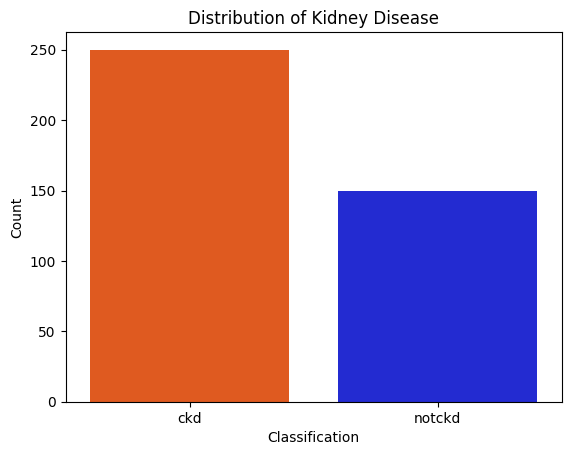

In [13]:
# Custom colors: 'notckd' = blue, 'ckd' = orange
custom_palette = {'notckd': "#0611eedd", 'ckd': "#ff4d00"}

# Countplot
sns.countplot(x='classification', hue='classification', data=kidney_df,
              palette=custom_palette, legend=False)
plt.title("Distribution of Kidney Disease")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.show()

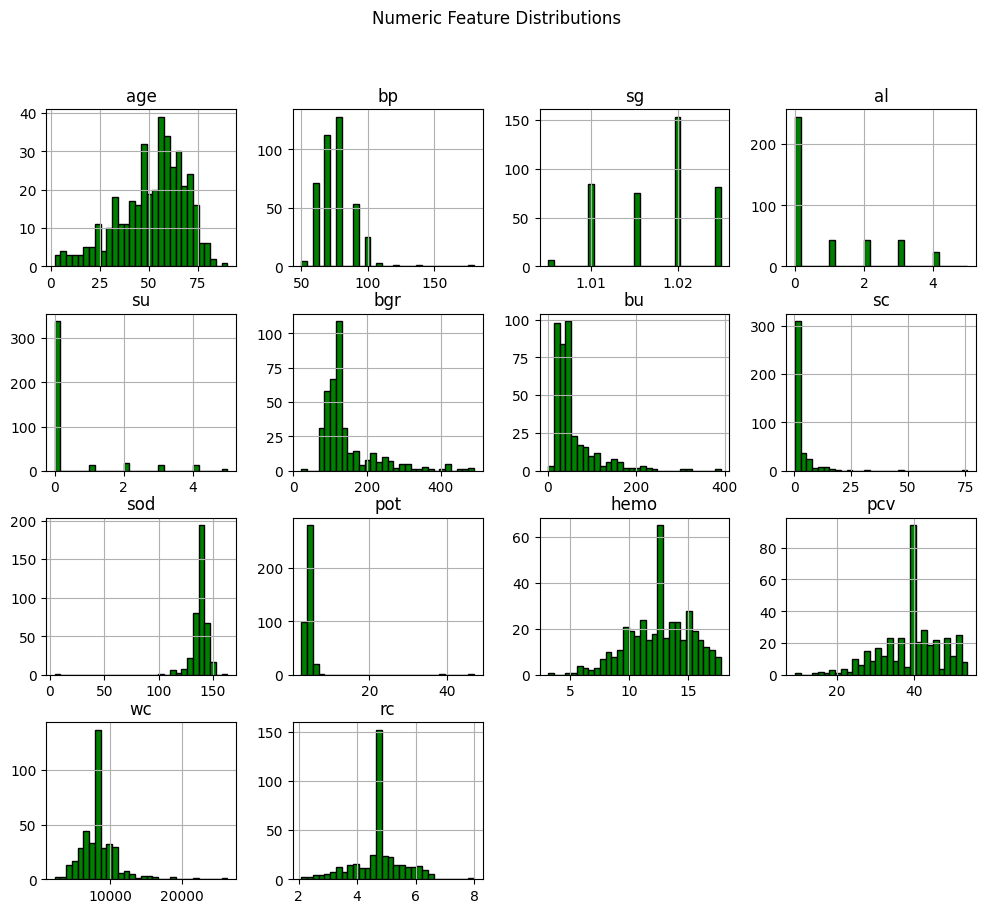

In [14]:
numeric_cols = kidney_df.select_dtypes(include=['int64', 'float64']).columns

kidney_df[numeric_cols].hist(figsize=(12,10), bins=30, 
                      color="green", edgecolor="black")

plt.suptitle("Numeric Feature Distributions")
plt.show()


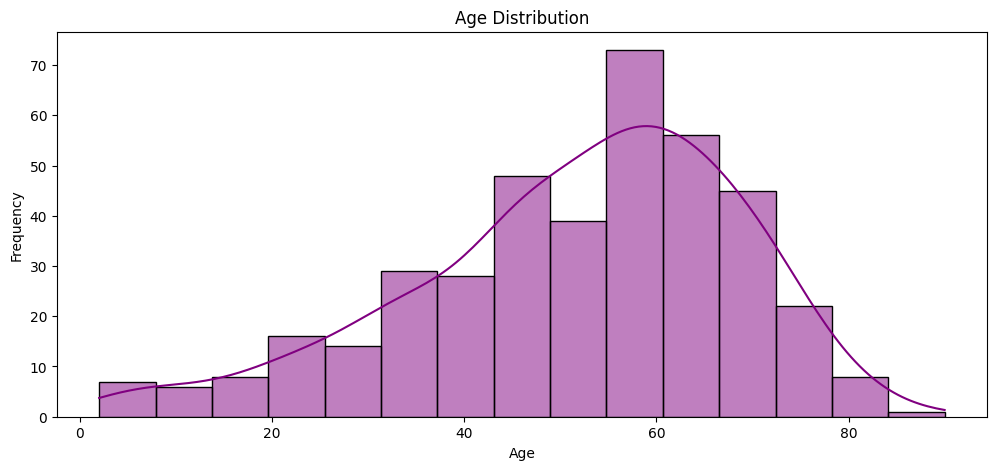

In [15]:
#Age Distribution

plt.figure(figsize=(12,5))
sns.histplot(kidney_df['age'], kde=True,color='purple', edgecolor='black')  # shows histogram with KDE curve
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#age 45 to 70 is most likely to be affected 


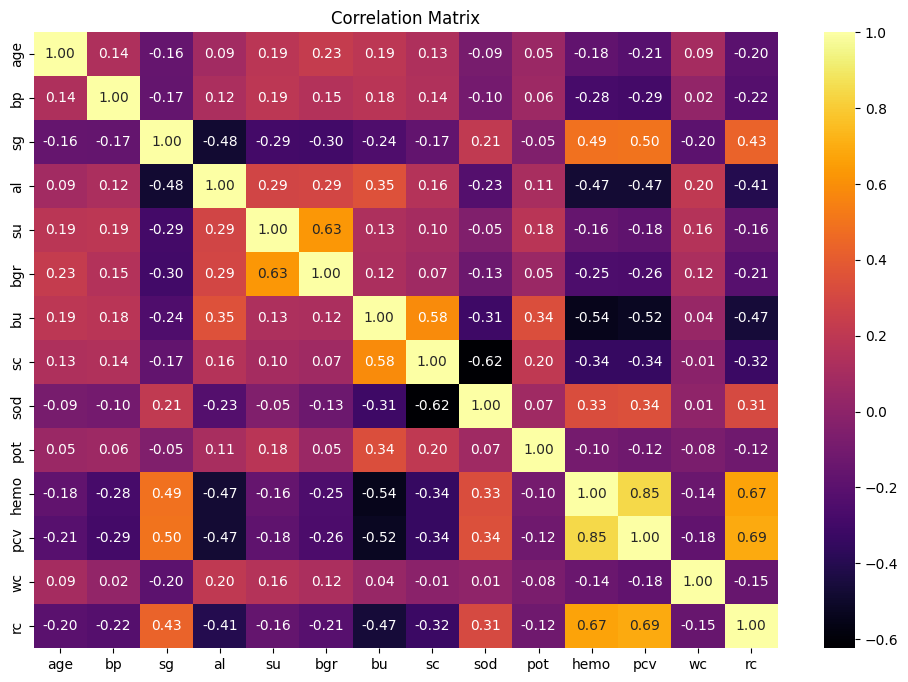

✅ Highly positively correlated pairs (corr > 0.8):

age  age     1.00000
pcv  hemo    0.84749
dtype: float64
✅ Moderate correlated pairs (corr < 0.5):

pcv  bu     -0.523091
bu   hemo   -0.541635
sod  sc     -0.624036
dtype: float64

❌ Highly negatively correlated pairs (corr < -0.8):

Series([], dtype: float64)


In [16]:
# Correlation heatmap

plt.figure(figsize=(12,8))
sns.heatmap(kidney_df[numeric_cols].corr(), annot=True, cmap='inferno', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Correlation matrix
corr_matrix = kidney_df[numeric_cols].corr()

# Unstack and remove self-correlations
corr_pairs = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()

# Threshold (you can change 0.8 → any value)
threshold = 0.8

# Highly positive correlations
high_pos_corr = corr_pairs[corr_pairs > threshold]


moderate_neg_corr = corr_pairs[corr_pairs < -0.5]  # anything less than -0.5

# Highly negative correlations
high_neg_corr = corr_pairs[corr_pairs < -threshold]



print("✅ Highly positively correlated pairs (corr > 0.8):\n")
print(high_pos_corr)

print("✅ Moderate correlated pairs (corr < 0.5):\n")
print(moderate_neg_corr)

print("\n❌ Highly negatively correlated pairs (corr < -0.8):\n")
print(high_neg_corr)


In [17]:
#Encoding 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_columns:
    kidney_df[col] = le.fit_transform(kidney_df[col])

In [18]:
# Step 1: Import Libraries

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix


In [19]:
# Step 2 : Split Features and Target

X = kidney_df.drop('classification',axis=1)
y = kidney_df['classification']

In [20]:
# Step 3 : Scale Features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Step 4 : Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)

In [22]:
# Step 5 : Model Training 

#Logistic Regression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:,1]

#Random Forest Classifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

In [23]:
#Step 6 : Evaluation

# ------------------------------
# Logistic Regression Evaluation
# ------------------------------
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print("ROC-AUC Score:", roc_auc_lr)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))



=== Logistic Regression ===
Accuracy: 0.9875

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.97      1.00      0.98        30

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

ROC-AUC Score: 1.0
Confusion Matrix:
 [[49  1]
 [ 0 30]]


In [24]:
# ------------------------------
# Random Forest Evaluation
# ------------------------------
print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print("ROC-AUC Score:", roc_auc_rf)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


=== Random Forest ===
Accuracy: 0.975

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80

ROC-AUC Score: 0.9993333333333334
Confusion Matrix:
 [[50  0]
 [ 2 28]]


In [25]:
# Step 7: Cross-Validation (5-fold)

cv_lr = cross_val_score(lr, X_scaled, y, cv=5, scoring='accuracy') 
cv_rf = cross_val_score(rf, X_scaled, y, cv=5, scoring='accuracy') 
print("\n5-Fold CV Accuracy:") 
print(f"Logistic Regression: {cv_lr.mean():.3f}") 
print(f"Random Forest: {cv_rf.mean():.3f}")


5-Fold CV Accuracy:
Logistic Regression: 0.995
Random Forest: 0.988


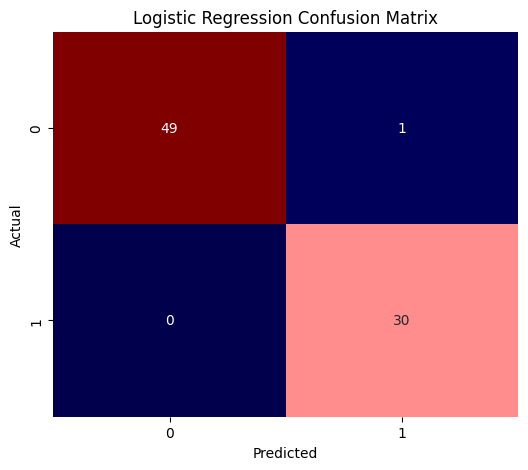

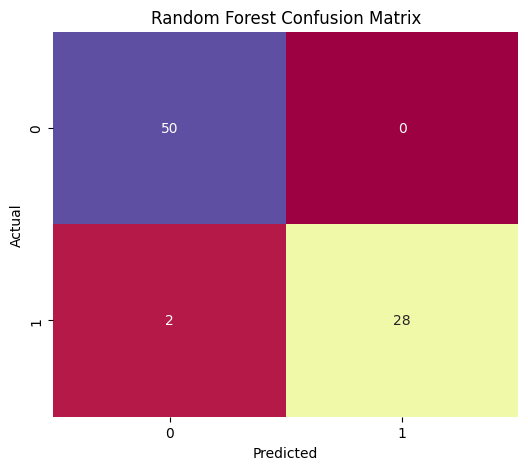

In [26]:
# Step 10: Confusion Matrix Plots
models = {
    'Logistic Regression': {'pred': y_pred_lr, 'cmap': 'seismic'},
    'Random Forest': {'pred': y_pred_rf, 'cmap': 'Spectral'}
}

for name, info in models.items():
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, info['pred']), 
                annot=True, fmt='d', cmap=info['cmap'], cbar=False)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [27]:
import joblib
#Save the tuned model
joblib.dump(rf, "random_forest_ckd.pkl")

#Save the scaler
joblib.dump(scaler, "scaler_ckd.pkl")

['scaler_ckd.pkl']

In [28]:
#Load the saved model and scaler

loaded_model = joblib.load("random_forest_ckd.pkl")
print("Model loaded successfully.")

#Save the scaler
scaler_ckd  = joblib.load("scaler_ckd.pkl")


Model loaded successfully.
